# STA130 HW06
**Alexey Albert** \
Chat Logs:

I was using chatgpt, and when I came back to the tab, a message popped up saying that it couldn't load the conversation along with what i assume is its uuid. (click on image for full res)

[![App Platorm](https://i.ibb.co/DQ0148L/chatbotsc.png)](https://ibb.co/FzRh60n)

### 1.
The simple linear regression model essentially estimates the general trend of data using a straight line.

- The Predictor Variable($x_i$): The independent variable 
- Outcome Variable($Y_i$): The dependant variable
- Slope($\beta_1$): The change in rise/run of the line, and shows how extreme the trend is and if its increasing or decreasing
- Intercept($\beta_0$): The $y$ value of the line at $x=0$
- Error term ($\epsilon_i$): A random variable to account for the variability of the data/it not being linear.

Since $\epsilon_i$ is normally distributed, the outcome given the predictor will also be normally distributed since its a linear combination of normally distributed components.

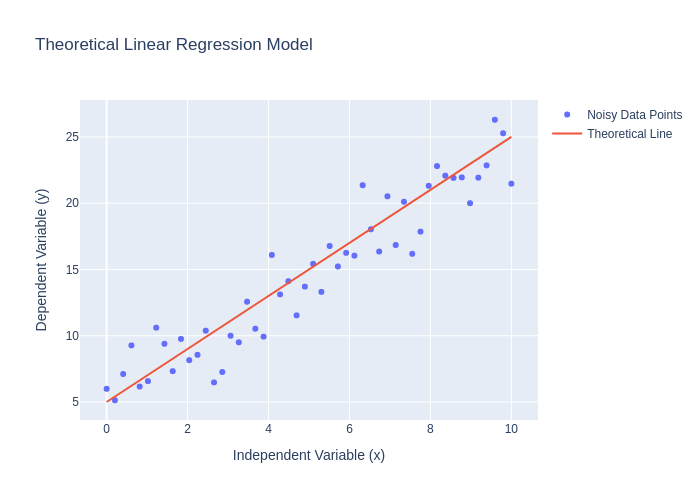

In [1]:
import numpy as np
import plotly.graph_objects as go

# Step 1: Define the theoretical model
slope = 2  # Theoretical slope (not fitted)
intercept = 5  # Theoretical intercept

# Step 2: Generate a range of x values and calculate the corresponding y values based on the theoretical line
x = np.linspace(0, 10, 50)  # Independent variable
y_theoretical = slope * x + intercept  # Calculate y based only on the theoretical slope and intercept

# (Optional) Generate some random data points around the theoretical line, just for visualization of scatter
np.random.seed(42)
y_noisy = y_theoretical + np.random.normal(0, 2, x.size)  # Add random noise

# Step 3: Create the plot with Plotly
fig = go.Figure()

# Scatter plot of the noisy data points (optional, for context)
fig.add_trace(go.Scatter(x=x, y=y_noisy, mode='markers', name='Noisy Data Points'))

# Line plot of the theoretical regression line
fig.add_trace(go.Scatter(x=x, y=y_theoretical, mode='lines', name='Theoretical Line'))

# Add titles and labels
fig.update_layout(
    title='Theoretical Linear Regression Model',
    xaxis_title='Independent Variable (x)',
    yaxis_title='Dependent Variable (y)',
    showlegend=True
)

fig.show(renderer="png")


### 2. 

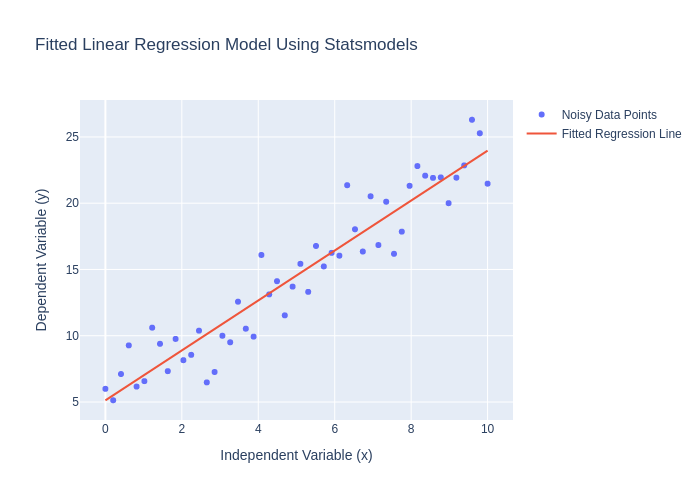

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Step 1: Generate the noisy data
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 50)
slope_theoretical = 2  # Theoretical slope
intercept_theoretical = 5  # Theoretical intercept
y_noisy = slope_theoretical * x + intercept_theoretical + np.random.normal(0, 2, x.size)

# Step 2: Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y_noisy})

# Step 3: Fit a linear regression model using statsmodels
model = smf.ols('y ~ x', data=data).fit()
data['y_fitted'] = model.fittedvalues  # Get the fitted values from the model

# Step 4: Create the plot with Plotly
fig = go.Figure()

# Scatter plot of the noisy data points
fig.add_trace(go.Scatter(x=data['x'], y=data['y'], mode='markers', name='Noisy Data Points'))

# Line plot of the fitted regression line
fig.add_trace(go.Scatter(x=data['x'], y=data['y_fitted'], mode='lines', name='Fitted Regression Line'))

# Add titles and labels
fig.update_layout(
    title='Fitted Linear Regression Model Using Statsmodels',
    xaxis_title='Independent Variable (x)',
    yaxis_title='Dependent Variable (y)',
    showlegend=True
)

fig.show(renderer="png")


### 3.

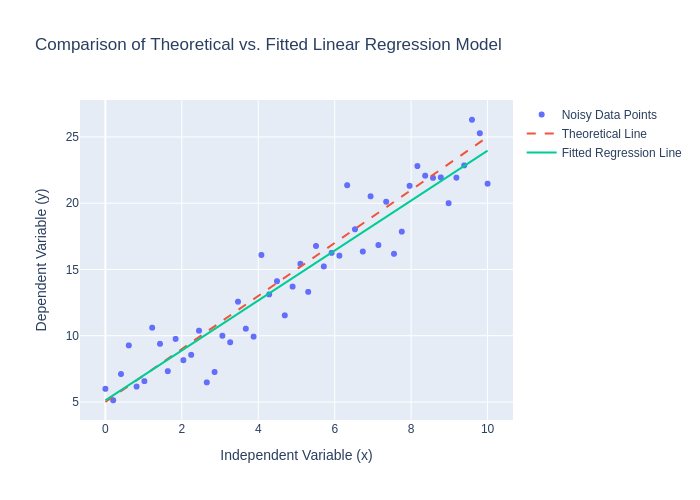

In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Step 1: Generate the noisy data
np.random.seed(42)  # For reproducibility
x = np.linspace(0, 10, 50)
slope_theoretical = 2  # Theoretical slope
intercept_theoretical = 5  # Theoretical intercept
y_noisy = slope_theoretical * x + intercept_theoretical + np.random.normal(0, 2, x.size)

# Step 2: Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y_noisy})

# Step 3: Fit a linear regression model using statsmodels
model = smf.ols('y ~ x', data=data).fit()
data['y_fitted'] = model.fittedvalues  # Get the fitted values from the model

# Step 4: Calculate the theoretical line (without fitting)
y_theoretical = slope_theoretical * x + intercept_theoretical

# Step 5: Create the plot with Plotly
fig = go.Figure()

# Scatter plot of the noisy data points
fig.add_trace(go.Scatter(x=data['x'], y=data['y'], mode='markers', name='Noisy Data Points'))

# Line plot of the theoretical regression line
fig.add_trace(go.Scatter(x=data['x'], y=y_theoretical, mode='lines', name='Theoretical Line', line=dict(dash='dash')))

# Line plot of the fitted regression line
fig.add_trace(go.Scatter(x=data['x'], y=data['y_fitted'], mode='lines', name='Fitted Regression Line'))

# Add titles and labels
fig.update_layout(
    title='Comparison of Theoretical vs. Fitted Linear Regression Model',
    xaxis_title='Independent Variable (x)',
    yaxis_title='Dependent Variable (y)',
    showlegend=True
)

fig.show(renderer="png")

The theoretical line is the ideal, noise free represntation of a linear regression model, while the fitted line uses a random sampling variation that results in a slightly random fitted line, to account for random variation in the data

### 4.

The fitted values are the predicted $Y_i$ values calculated by applying the coefficients (from `fromfitted_model.summary().tables[1]`) to each x value in the dataset using the linear regression formula

### 5.

The OLS method results in a line that is as close to the theoretical line as possible, minimizing the difference between the predicted/theortical value on the line, and the value in the fitted line.

Using "squares" ensures that large(r) deviations from the the theoretical line are penalized more heavily, and that negative and positive values don't cancel each other out.

### 6.

**1.** This measures how much variation in $Y_i$ the model does not explain relative to the total variation in $Y_i$. Subtracting this ratio from 1 gives the proportion of  $Y_i$'s total variation that the model explains, which is $R^2$

**2.** Provides the proportion of variation in $Y_i$ explained by the model, AKA the accuracy

**3.** This is just how well the actual $Y_i$ values align with the model's predicted $Y_i$ values, which when squared is the same thing as $R^2$/the accuracy

**4.** This is the strength of the linear relationship between $Y_i$ and $x_i$ and is also just $R^2$

### 7.

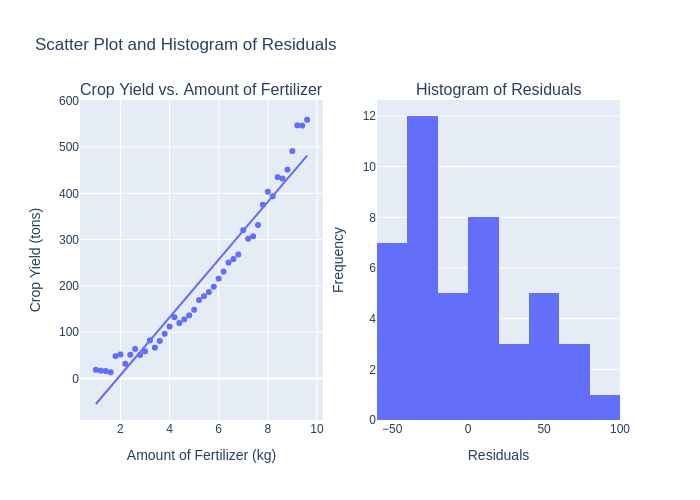

In [4]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


- It seems like the relationship between $x_i$ and $Y_i$ isn't linear, and is possibly even exponential
- It seems like the error term doesn't have a constant variance/shows heteroscedasticity instead of homoscedasticity
- The residuals aren't normally distributed, as indicated by the histogram of residuals

### 8.

Null Hypothesis ($H_0$): The slope parameter ($\beta_1$) is equal to zero. $H_0$ : $\beta_1$ = 0

In [5]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        00:08:13   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the the p-value for the slope is 0 (waiting value for $P>|t|$), there is a linear association between the waiting time and the duration of eruptions.

### 9.

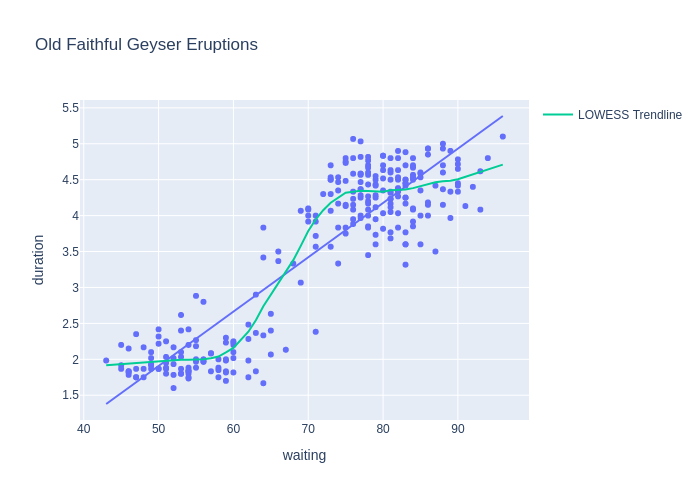

In [6]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


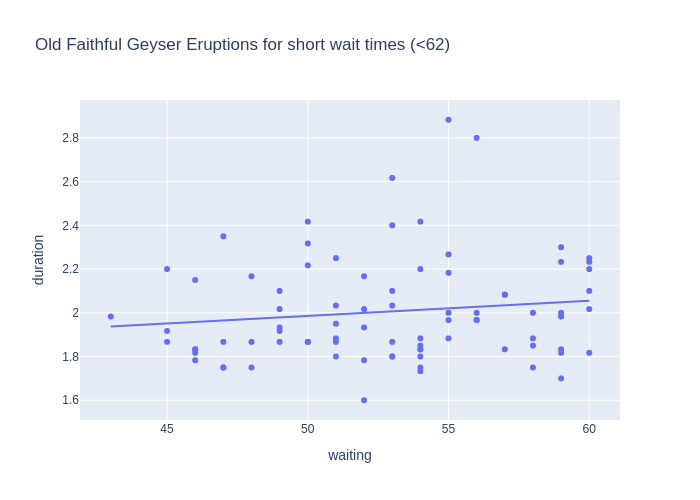

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Since the p-value for the restricted plot is 0.238, there is insufficient evidence to conclude that there's a linear relationship between wait time and duration within these shorter waiting times.

### 10.

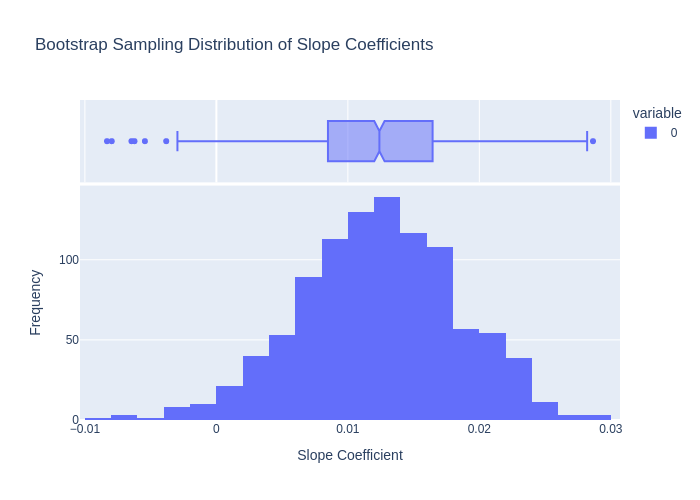

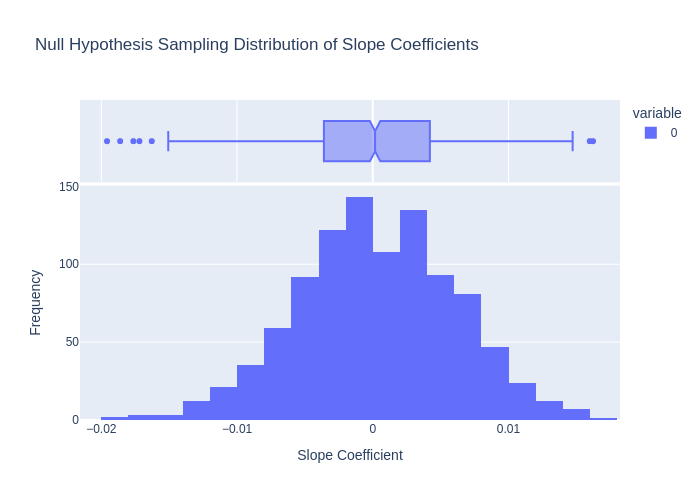

95% Bootstrapped Confidence Interval for Slope: [0.0003, 0.0232]
Does the confidence interval contain 0? No
Fitted Model Slope P-value: 0.0381
Simulated P-value based on Null Hypothesis: 0.0360


In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Assuming `old_faithful` DataFrame is already loaded
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Step 1: Bootstrap Sampling Distribution of the Fitted Slope Coefficients

# Bootstrap parameters
n_bootstrap = 1000
n_samples = len(long_wait_data)
bootstrap_slopes = []

# Bootstrap loop
for _ in range(n_bootstrap):
    sample_data = long_wait_data.sample(n=n_samples, replace=True)
    model = smf.ols('duration ~ waiting', data=sample_data).fit()
    bootstrap_slopes.append(model.params['waiting'])

# Plot the bootstrap sampling distribution of the slopes
fig1 = px.histogram(bootstrap_slopes, nbins=30, title="Bootstrap Sampling Distribution of Slope Coefficients",
                    labels={'value': 'Slope Coefficients'}, marginal="box")
fig1.update_layout(xaxis_title="Slope Coefficient", yaxis_title="Frequency")
fig1.show(renderer="png")

# Step 2: Simulate Samples Under Null Hypothesis and Collect Sampling Distribution of Fitted Slopes

# Null hypothesis parameters
beta_0 = 1.65  # Intercept under null hypothesis
beta_1 = 0     # Slope under null hypothesis
sigma = 0.37   # Standard deviation of errors

# Simulation parameters
simulated_slopes = []

# Simulation loop
for _ in range(n_bootstrap):
    y_simulated = beta_0 + beta_1 * long_wait_data['waiting'] + np.random.normal(0, sigma, n_samples)
    simulated_data = pd.DataFrame({'waiting': long_wait_data['waiting'], 'duration': y_simulated})
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    simulated_slopes.append(model.params['waiting'])

# Plot the null hypothesis sampling distribution of the slopes
fig2 = px.histogram(simulated_slopes, nbins=30, title="Null Hypothesis Sampling Distribution of Slope Coefficients",
                    labels={'value': 'Slope Coefficients under Null Hypothesis'}, marginal="box")
fig2.update_layout(xaxis_title="Slope Coefficient", yaxis_title="Frequency")
fig2.show(renderer="png")

# Step 3: Calculate 95% Bootstrapped Confidence Interval and Compare with Fitted Model

# Confidence interval for bootstrap slopes
lower_bound, upper_bound = np.percentile(bootstrap_slopes, [2.5, 97.5])

# Check if 0 is within the confidence interval
contains_zero = lower_bound <= 0 <= upper_bound

# Fit the model to the original data
fitted_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()

# p-value from the fitted model for comparison
fitted_slope_pvalue = fitted_model.pvalues['waiting']

# Simulated p-value based on null hypothesis
simulated_p_value = np.mean([abs(slope) >= abs(fitted_model.params['waiting']) for slope in simulated_slopes])

# Output results
print(f"95% Bootstrapped Confidence Interval for Slope: [{lower_bound:.4f}, {upper_bound:.4f}]")
print(f"Does the confidence interval contain 0? {'Yes' if contains_zero else 'No'}")
print(f"Fitted Model Slope P-value: {fitted_slope_pvalue:.4f}")
print(f"Simulated P-value based on Null Hypothesis: {simulated_p_value:.4f}")


### 11.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


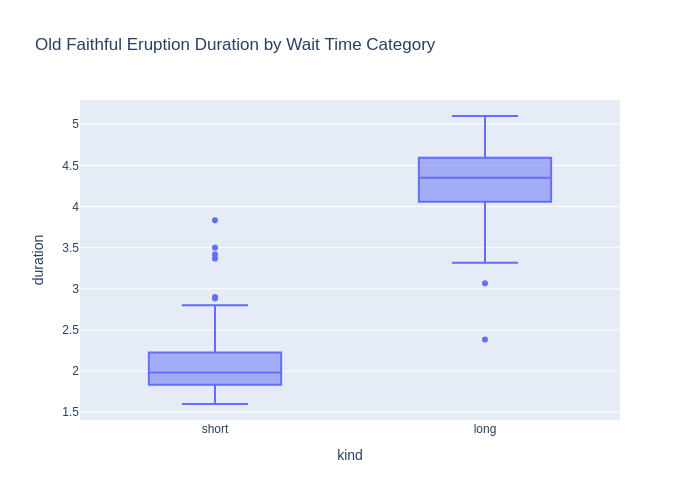

In [9]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
from IPython.display import display

# Assume old_faithful dataset has already been loaded as per the earlier context.

# Create an indicator variable 'kind' for 'short' and 'long' wait times
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'long' if x >= 68 else 'short')

# Fit the indicator variable model
model_indicator = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
display(model_indicator.summary().tables[1])  # Display only the coefficient table

# Visualize the differences in duration between 'short' and 'long' wait times
fig = px.box(old_faithful, x='kind', y='duration',
             title='Old Faithful Eruption Duration by Wait Time Category',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")  # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


- Original Model (duration ~ waiting): Looks at waiting as a continuous variable. It tells us the overall trend in duration as waiting time increases.
- Short Wait Model: Only for short wait times (e.g., under 62 minutes). Helps us see if the relationship holds when people don’t wait as long.
- Long Wait Model: Only for long wait times (e.g., over 71 minutes). Checks if the relationship between waiting and duration is stronger for longer waits.
- Indicator Model (duration ~ C(kind)): Splits waiting into “short” (< 68 min) and “long” (≥ 68 min) categories, ignoring the exact waiting value. It just sees if long waits lead to longer eruptions on average than short waits

**Key Difference**
The indicator model is simpler since it just compares averages between “short” and “long” waits instead of finding a continuous trend. Good for spotting big-picture differences between short vs. long waits.

**Evidence Against the Null Hypothesis**
For the indicator model, the null hypothesis is “no difference in duration between short and long waits.” The p-value for kind[T.long] is under 0.05 so we can say there’s a significant difference in average duration between the two groups

### 12.

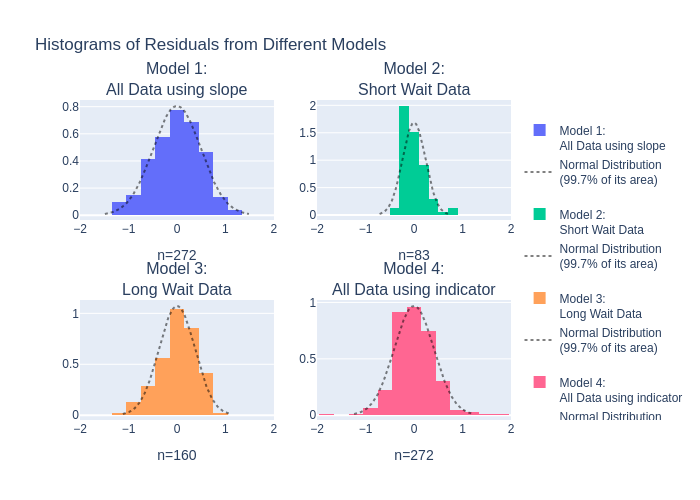

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model 4 is likely to support the normality assumption best because it accounts for the two distinct types of data (short and long waits) using an indicator variable. This distinction helps mitigate non-normality by capturing different patterns in the data, allowing residuals to better approximate a normal distribution.

The other three models (Models 1, 2, and 3) are less likely to support the normality assumption because they either lump all data together without accounting for the short vs. long wait structure (Model 1) or restrict the analysis to only one type of wait time (Models 2 and 3). This can lead to skewed or irregular residuals due to the variation in eruption durations between short and long waits, thereby failing to meet the assumption of normally distributed error terms.

### 13.

### (A) Permutation Test for ($H_0: \mu_{\text{short}} = \mu_{\text{long}}$)

A permutation test evaluates the null hypothesis that there’s no difference in means between the two groups by “shuffling” or randomly reassigning group labels multiple times. Here's how this approach works:

1. **Calculate Observed Difference**: First, we calculate the observed mean difference between the "short" and "long" groups in the original data.
  
2. **Shuffle Labels**: Under the null hypothesis, we assume there's no real difference between groups, so the observed difference is due to random variation. We simulate this by shuffling the labels (assigning each data point to “short” or “long” randomly) and recalculating the mean difference after each shuffle. 

3. **Repeat and Collect Differences**: We repeat the shuffling process many times (e.g., 10,000 times) and collect the mean differences generated in each permutation.

4. **Compare Observed vs. Permutation Differences**: Finally, we compare the original observed difference with the distribution of mean differences from the shuffled data to calculate a p-value. This p-value represents the probability of seeing a difference as extreme as the observed difference, assuming the null hypothesis is true.

Here's the code to perform the permutation test:

In [11]:
import numpy as np

# Separate the data into the short and long groups
short_wait_data = old_faithful[old_faithful['waiting'] <= 71]['duration']
long_wait_data = old_faithful[old_faithful['waiting'] > 71]['duration']

# Calculate the observed mean difference
observed_mean_diff = short_wait_data.mean() - long_wait_data.mean()

# Permutation test
n_permutations = 10000
permutation_diffs = []

combined_data = np.concatenate([short_wait_data, long_wait_data])
for _ in range(n_permutations):
    np.random.shuffle(combined_data)  # Shuffle the combined data
    perm_short = combined_data[:len(short_wait_data)]
    perm_long = combined_data[len(short_wait_data):]
    perm_diff = np.mean(perm_short) - np.mean(perm_long)
    permutation_diffs.append(perm_diff)

# Calculate p-value as the proportion of shuffled differences as extreme as the observed difference
p_value = np.mean(np.abs(permutation_diffs) >= np.abs(observed_mean_diff))
print(f"Observed Mean Difference: {observed_mean_diff}")
print(f"Permutation Test p-value: {p_value}")

Observed Mean Difference: -2.0801883928571434
Permutation Test p-value: 0.0


### (B) Bootstrap Confidence Interval for Difference in Means

The bootstrap approach resamples from the observed data (with replacement) within each group to create new samples, providing a distribution of the mean difference. Here’s how it works:

1. **Bootstrap Sampling**: For each bootstrap iteration, we randomly sample (with replacement) from the "short" and "long" groups separately, generating a new sample of each group.

2. **Calculate Bootstrap Mean Differences**: For each resampled pair, calculate the mean difference between the "short" and "long" groups.

3. **Repeat and Construct Confidence Interval**: Repeat this process many times (e.g., 10,000 times) to build a distribution of the mean differences. The 95% confidence interval is then found by taking the 2.5th and 97.5th percentiles of this distribution.

Here's the code for bootstrapping:

In [12]:
# Bootstrap parameters
n_bootstrap = 10000
bootstrap_mean_diffs = []

# Bootstrap sampling
for _ in range(n_bootstrap):
    short_sample = np.random.choice(short_wait_data, size=len(short_wait_data), replace=True)
    long_sample = np.random.choice(long_wait_data, size=len(long_wait_data), replace=True)
    mean_diff = short_sample.mean() - long_sample.mean()
    bootstrap_mean_diffs.append(mean_diff)

# Calculate 95% bootstrap confidence interval
ci_lower, ci_upper = np.quantile(bootstrap_mean_diffs, [0.025, 0.975])
print(f"95% Bootstrap Confidence Interval for Mean Difference: [{ci_lower}, {ci_upper}]")

95% Bootstrap Confidence Interval for Mean Difference: [-2.2074815625, -1.9441987946428572]


### (a) Explanation of Sampling Approaches

- **Permutation Test**: The permutation test simulates the null hypothesis by breaking any association between the group labels (short and long) and the values. By randomly shuffling labels, we assume any difference is due to chance, thus estimating what distribution of mean differences we might expect if there were no real difference. It’s useful when we’re testing for a specific hypothesis without assuming normality.

- **Bootstrap Confidence Interval**: The bootstrap resamples within each group independently, allowing us to estimate the sampling distribution of the mean difference between groups. This approach doesn't assume anything about the shape of the original data distribution and generates confidence intervals directly from the resampled differences. It's more about estimating the range of plausible values for the true difference rather than directly testing a null hypothesis.

### (b) Comparison with the Indicator Variable Model Approach

The indicator variable approach (used in Question 11) adds an indicator variable for "short" and "long" groups directly in the regression model. Here’s how it compares to the permutation and bootstrap approaches:

- **Similarity**: 
  - All three methods aim to assess the difference in means between the short and long wait groups.
  - They each provide a way to evaluate whether the observed differences are statistically significant (permutation test through p-value, bootstrap through confidence interval, and the indicator variable model through the regression coefficient's p-value).

- **Differences**:
  - **Statistical Assumptions**:
    - The permutation test and bootstrap methods are **non-parametric**; they do not assume normality of errors or any specific distribution.
    - The indicator variable model relies on **regression assumptions**, including linearity and normality of residuals. This method is more powerful if these assumptions hold, as it leverages them to infer results.
  - **Interpretation of Output**:
    - The permutation test provides a **p-value** by comparing observed differences to a distribution under the null hypothesis.
    - The bootstrap method gives a **confidence interval**, offering a range of plausible values for the mean difference.
    - The indicator variable model offers both a **p-value and confidence interval** for the coefficient associated with the indicator, directly measuring the effect of group membership on `duration`.
  - **Hypothesis Testing vs. Estimation**:
    - The permutation test is focused on **hypothesis testing** for no difference.
    - The bootstrap method is more about **estimation** and gives insight into the range of the mean difference.
    - The indicator variable model serves both purposes: it estimates the effect of the indicator variable and tests for its significance within a regression framework. 

In summary, while the permutation test and bootstrap are more flexible and assumption-free, the indicator variable model can be more efficient if assumptions hold. The choice between these methods depends on data characteristics and whether estimation or hypothesis testing is the primary goal.

### 14.
yes.